<a href="https://colab.research.google.com/github/Jayganesh-C/Airbnb-booking-analysis/blob/main/Airbnb_Bookings_Analysis_Capstone_Project_Jayganesh_C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

1.Pie chart of popular neighborhood group based on number of reviews 

2.Busiest hosts plotted in number of reviews vs neighborhood group

3. Show the graph of neighborhood group and neighborhood and see the relationship 

#### **Import necessary modules required.**

In [1]:
from google.colab import drive
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
air_bnb_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/EDA Capstone 1/Airbnb NYC 2019.csv')

### **Making sure the columns neighbourhood_group, room_type, price, number_of_reviews, room_type, minimum_nights and availability_365 does not have null or NaN values**

In [ ]:
air_bnb_df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

**Inference**

From table we can see that none of the columns neighbourhood_group, room_type, price, number_of_reviews, room_type, minimum_nights and availability_365 **does not have none values**.

### **Analysing the price amoung various neighborhood group and neighborhood**

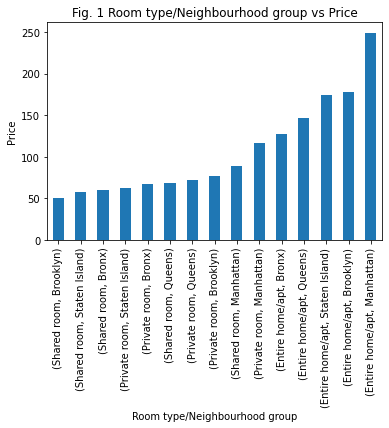

In [56]:
# Find the mean price by grouping by room type and neighbourhood group 
room_type_df = air_bnb_df.groupby(['room_type','neighbourhood_group'])['price'].mean().sort_values(ascending=True)
room_type_df.plot(kind='bar').set_title('price vs room_type/neighbourhood_group')
plt.xlabel("Room type/Neighbourhood group")
plt.ylabel("Price")
plt.title("Fig. 1 Room type/Neighbourhood group vs Price")
plt.show()

In [ ]:
# Find price for each room type and find the mean for the room types
price_df = air_bnb_df.groupby(['room_type'])['price'].mean().sort_values(ascending=True)
price_df.astype(int)
# Convert it into dataFrame and setting index for it
price_df = price_df.to_frame()
price_df = price_df.reset_index()
price_df.head()

,room_type,price
0,Shared room,70.127586
1,Private room,89.780973
2,Entire home/apt,211.794246


**Inference**

1.We can see from the table that (Shared room and Private room) is move affordable when compared to Entire home/apt.

2.From the graph we can see that Entire home/apt is most costly and Shared Room in Brooklyn is cheapest.

### **Analysis of reviews for various neighbourhood_groups to get a better picture**



In [53]:
# Getting the total number of reviews and group by neighbourhood group
number_of_reviews_df = air_bnb_df.groupby(['neighbourhood_group'])['number_of_reviews'].sum()
# Convert it into a dataframe
number_of_reviews_df = number_of_reviews_df.to_frame()
# Resetting the index 
number_of_reviews_df = number_of_reviews_df.reset_index()
# Calculating the percentage and creating a new column for it
total_reviews = number_of_reviews_df['number_of_reviews'].sum()
number_of_reviews_df['review_percentage'] = number_of_reviews_df['number_of_reviews'] / number_of_reviews_df['number_of_reviews'].sum() * 100
number_of_reviews_df.head()

,neighbourhood_group,number_of_reviews,review_percentage
0,Bronx,28371,2.493047
1,Brooklyn,486574,42.756754
2,Manhattan,454569,39.944376
3,Queens,156950,13.791679
4,Staten Island,11541,1.014143


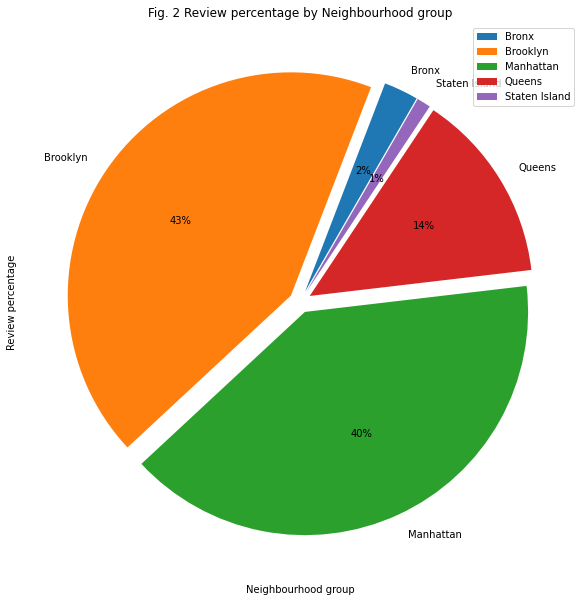

In [55]:
explode = (0.05, 0.05, 0.05, 0.05, 0.05)
number_of_reviews_df.groupby(['neighbourhood_group']).sum().plot(
    kind='pie', y='number_of_reviews', autopct='%1.0f%%', startangle=60, explode=explode,figsize = (10,20)).set_title('Review percentage grouped by Neighbourhood group')
plt.xlabel("Neighbourhood group")
plt.ylabel("Review percentage")
plt.title("Fig. 2 Review percentage by Neighbourhood group")
plt.show()

####**Inference**
1. Manhattan/ Brooklyn has the hightest percentage of reviews.
2.Manhattan/ Brooklyn has the most number of rooms and Bronx/ Staten Island has least.
2. There are more Entire home/apt. has more values and Shared room is least.

### **Analysis of neighbourhood_group vs availability_365 to get a better understanding of availabitly of rooms**

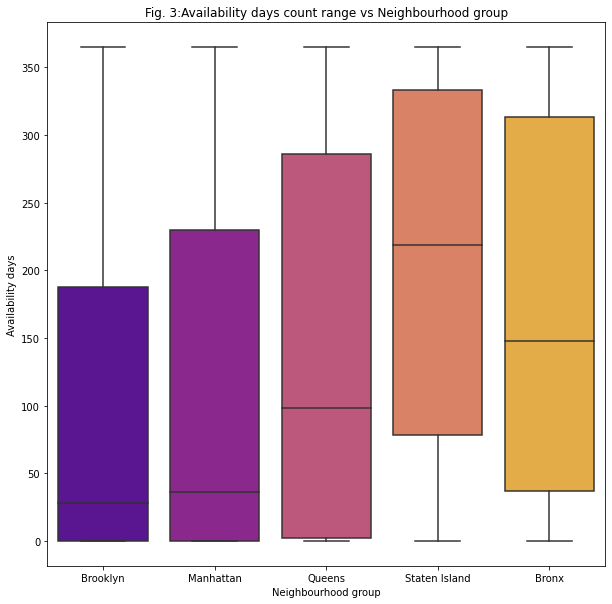

In [35]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(data=air_bnb_df, x='neighbourhood_group',y='availability_365',palette='plasma')
plt.xlabel("Neighbourhood group")
plt.ylabel("Availability days")
plt.title("Fig. 3:Availability days count range vs Neighbourhood group")
plt.show()

**Inference**

From the box plot ablove we can conclude that Brooklyn is least available and Staten Island is most available throught the year.

### **Analysis of minimum_nights required to stay in the room.**

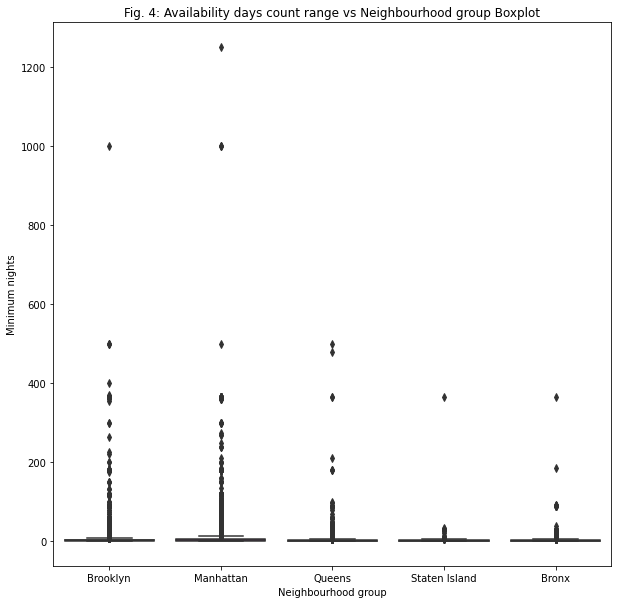

In [36]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(data=air_bnb_df, x='neighbourhood_group',y='minimum_nights',palette='plasma')
# Add X, Y label and title of the boxplot
plt.xlabel("Neighbourhood group")
plt.ylabel("Minimum nights")
plt.title("Fig. 4: Availability days count range vs Neighbourhood group Boxplot")
plt.show()


**Inference**

Manhattan has some rooms with highest minimum nights and brooklyn has some flexibility with respect to minimum number of nights.

Text(0.5, 1.0, 'Fig. 5: Minimum nights less than 50')

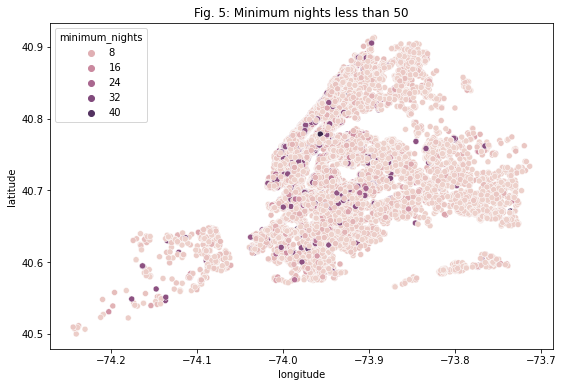

In [50]:
# Selecting the Data Frame with minimum_nights less than 50
minimum_nights_lower_range_df = air_bnb_df[air_bnb_df['minimum_nights'] < 50]
plt.figure(figsize=(9,6))
sns.scatterplot(x=minimum_nights_lower_range_df.longitude,y=minimum_nights_lower_range_df.latitude,hue=minimum_nights_lower_range_df.minimum_nights)
plt.title("Fig. 5: Minimum nights less than 50")

**Inference**

Minimum nights less than 8 is spread across New York.

Text(0.5, 1.0, 'Fig. 6: Minimum nights greater than 50')

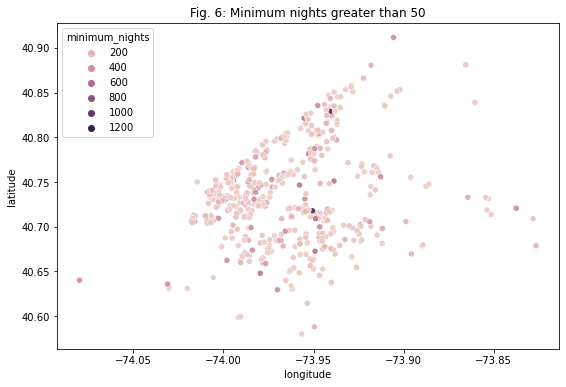

In [51]:
# Selecting the Data Frame with minimum_nights greater than 50
minimum_nights_higher_range_df = air_bnb_df[air_bnb_df['minimum_nights'] >= 50]
plt.figure(figsize=(9,6))
sns.scatterplot(x=minimum_nights_higher_range_df.longitude,y=minimum_nights_higher_range_df.latitude,hue=minimum_nights_higher_range_df.minimum_nights)
plt.title("Fig. 6: Minimum nights greater than 50")

**Inference**

We can notice the Manhattan's values from Fig.4 in this Fig.6 as the dark spots. Rooms with minimum nights less than 50 is spread less across the city.  